<a href="https://www.kaggle.com/code/arnabmukherjee853/digits-detection-pca-ann-cnn?scriptVersionId=196029300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import datasets

In [3]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [4]:
from sklearn.datasets import load_digits

In [5]:
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

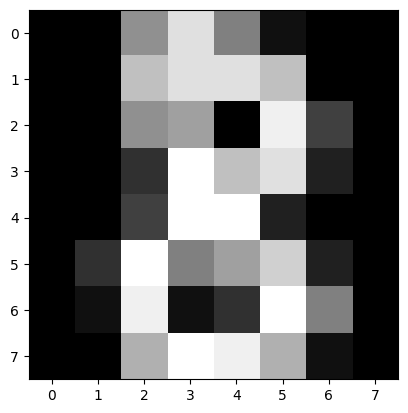

In [7]:
plt.imshow(digits.images[8],cmap=plt.cm.gray)

In [8]:
df=pd.DataFrame(digits.data)
df     # without target variable. only 64 features are here.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [9]:
digits.target      # This is the target variable. for model building we are going to use this column as the target.

array([0, 1, 2, ..., 8, 9, 8])

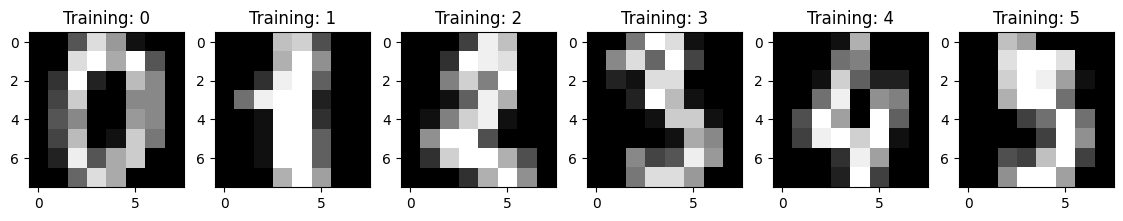

In [10]:
plt.figure(figsize=(14,4))
for index,(image,label) in enumerate(zip(digits.data[0:6],digits.target[0:6])):
    plt.subplot(1,6,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f"Training: {label}",fontsize=12)

In [11]:
x=digits.data
y=digits.target
print(x.shape,y.shape)

(1797, 64) (1797,)


In [12]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

Here we get 1.7k+ entries with 64 column, to reduce to complexity of the data we are going to use PCA analysis which can curtail unnecessary columns from our dataset and make more robust to use.

for implementing PCA we need to fing the eigen values and eigen vectors of each column, so we transpose our data for desired result

In [13]:
X_transpose= x_std.T
X_transpose

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.33501649, -0.33501649, -0.33501649, ..., -0.33501649,
        -0.33501649, -0.33501649],
       [-0.04308102, -1.09493684, -1.09493684, ..., -0.88456568,
        -0.67419451,  1.00877481],
       ...,
       [-1.14664746,  0.54856067,  1.56568555, ..., -0.12952258,
         0.8876023 ,  0.8876023 ],
       [-0.5056698 , -0.5056698 ,  1.6951369 , ..., -0.5056698 ,
        -0.5056698 , -0.26113572],
       [-0.19600752, -0.19600752, -0.19600752, ..., -0.19600752,
        -0.19600752, -0.19600752]])

Covarience Matrix

In [14]:
cov=np.cov(X_transpose)
cov

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.00055679,  0.55692803, ..., -0.02988686,
         0.02656195, -0.04391324],
       [ 0.        ,  0.55692803,  1.00055679, ..., -0.04120565,
         0.07263924,  0.08256908],
       ...,
       [ 0.        , -0.02988686, -0.04120565, ...,  1.00055679,
         0.64868875,  0.26213704],
       [ 0.        ,  0.02656195,  0.07263924, ...,  0.64868875,
         1.00055679,  0.62077355],
       [ 0.        , -0.04391324,  0.08256908, ...,  0.26213704,
         0.62077355,  1.00055679]])

Eigen values and Eigen vectors

In [15]:
eigen_value,eigen_vector=np.linalg.eig(cov)
eigen_value

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.05037444, 0.29406627, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [16]:
eigen_vector

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [17]:
# individual explained varience
total_v=sum(eigen_value)
var_exp=[(i/total_v)*100 for i in sorted(eigen_value,reverse=True)]    
var_exp  # showing the contribution of each column/ importance of each column

[12.033916097734904,
 9.561054403097883,
 8.444414892624566,
 6.498407907524167,
 4.860154875966403,
 4.214119869271944,
 3.9420828035674003,
 3.3893809246383264,
 2.998221011625232,
 2.9320025512522068,
 2.781805463550326,
 2.5770550925819995,
 2.2753033157642486,
 2.227179739514353,
 2.1652294318492435,
 1.9141666064421259,
 1.7755470851681938,
 1.6380692742844212,
 1.5964601688623428,
 1.4891911870878194,
 1.3479695658179378,
 1.2719313702347599,
 1.1658373505919493,
 1.0576465985363224,
 0.9753159471981139,
 0.9445589897319981,
 0.8630138269707229,
 0.8366428536685183,
 0.7976932484112456,
 0.7464713709260611,
 0.725582151370274,
 0.691911245481183,
 0.6539085355726172,
 0.640792573845988,
 0.5913841117223424,
 0.571162405223525,
 0.5236368034166339,
 0.48180758644514254,
 0.45371925985845096,
 0.42316275323278085,
 0.4060530699790386,
 0.39708480827582743,
 0.3564933031426177,
 0.34078718147030074,
 0.32783533528795417,
 0.3110320073453569,
 0.28857529410893434,
 0.276489263523546

Now cumulative explained varience

In [18]:
cu_sum= np.cumsum(var_exp)
cu_sum

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.6547485 ,  95.07791125,
        95.48396432,  95.88104913,  96.23754243,  96.57832961,
        96.90616495,  97.21719696,  97.50577225,  97.78226151,
        98.04143645,  98.27591946,  98.49417632,  98.69777395,
        98.89328638,  99.07660488,  99.24455127,  99.40578733,
        99.55355002,  99.68866843,  99.81376918,  99.91746491,
       100.        , 100.        , 100.        , 100.  

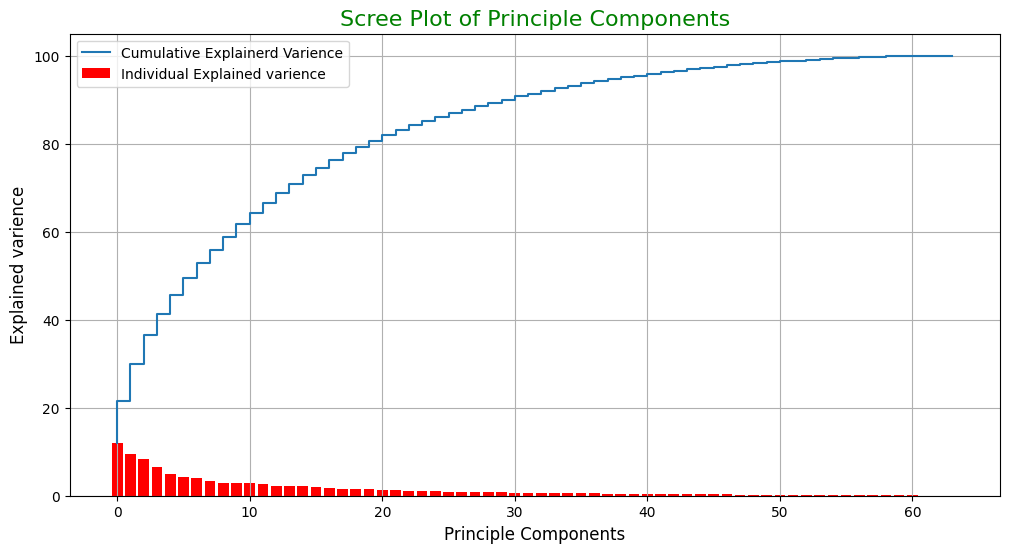

In [19]:
plt.figure(figsize=(12,6))
plt.bar(range(len(var_exp)),var_exp,label='Individual Explained varience',color='r')
plt.step(range(len(cu_sum)),cu_sum,label='Cumulative Explainerd Varience')
plt.xlabel('Principle Components',fontsize=12)
plt.ylabel('Explained varience',fontsize=12)
plt.title('Scree Plot of Principle Components',fontsize=16,color='g')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_std,y,train_size=.8)
print(xtrain.shape,xtest.shape)

(1437, 64) (360, 64)


In [21]:
from sklearn.decomposition import PCA
Decomp=PCA(n_components=30)
pca_xtrain=Decomp.fit_transform(xtrain)
pca_xtest=Decomp.transform(xtest)
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier().fit(pca_xtrain,ytrain)
pred=DT.predict(pca_xtest)
pred

array([2, 4, 8, 9, 4, 3, 4, 3, 9, 9, 1, 1, 2, 3, 2, 1, 1, 3, 5, 5, 3, 9,
       0, 8, 0, 3, 7, 8, 2, 8, 9, 7, 3, 9, 9, 4, 9, 0, 0, 1, 0, 2, 4, 3,
       2, 3, 8, 4, 4, 1, 0, 2, 7, 8, 2, 1, 3, 2, 2, 4, 4, 8, 6, 2, 1, 6,
       8, 1, 8, 6, 4, 5, 1, 9, 8, 1, 9, 9, 0, 5, 5, 0, 4, 2, 4, 9, 4, 8,
       8, 9, 9, 2, 2, 7, 6, 8, 4, 6, 4, 4, 0, 0, 0, 6, 8, 5, 9, 8, 8, 3,
       9, 8, 7, 6, 0, 8, 9, 4, 9, 9, 8, 9, 4, 4, 7, 1, 9, 2, 3, 0, 3, 7,
       6, 1, 4, 8, 0, 8, 3, 4, 0, 8, 0, 9, 6, 9, 7, 1, 4, 6, 7, 4, 9, 9,
       9, 5, 5, 7, 4, 3, 1, 6, 0, 2, 5, 0, 8, 1, 7, 6, 6, 2, 5, 6, 8, 5,
       4, 5, 8, 4, 2, 8, 7, 0, 5, 7, 7, 6, 5, 8, 6, 9, 6, 7, 5, 7, 7, 1,
       6, 5, 7, 5, 5, 5, 4, 5, 6, 2, 2, 9, 0, 5, 1, 2, 3, 2, 3, 9, 1, 3,
       0, 2, 6, 2, 5, 5, 2, 7, 6, 3, 7, 5, 5, 4, 7, 4, 1, 5, 2, 5, 4, 8,
       9, 2, 3, 4, 8, 3, 6, 8, 4, 9, 2, 3, 7, 5, 6, 9, 2, 8, 0, 8, 9, 7,
       5, 3, 9, 4, 4, 5, 6, 2, 7, 0, 2, 1, 5, 7, 2, 1, 2, 0, 3, 8, 7, 8,
       4, 2, 8, 0, 4, 7, 5, 3, 4, 3, 8, 3, 0, 3, 5,

In [22]:
ytest

array([2, 4, 8, 9, 4, 9, 4, 3, 9, 9, 1, 1, 2, 3, 2, 1, 1, 3, 5, 5, 3, 9,
       0, 8, 0, 3, 7, 8, 2, 3, 6, 7, 3, 8, 9, 4, 9, 0, 0, 1, 0, 2, 4, 3,
       2, 3, 8, 4, 4, 1, 0, 2, 7, 8, 2, 1, 3, 2, 2, 7, 4, 8, 6, 2, 1, 6,
       5, 1, 8, 3, 9, 5, 1, 5, 8, 1, 9, 9, 0, 9, 5, 0, 4, 2, 4, 7, 4, 8,
       5, 9, 5, 2, 2, 7, 6, 5, 4, 6, 4, 4, 0, 0, 0, 6, 9, 5, 9, 8, 8, 3,
       9, 8, 7, 6, 0, 1, 9, 4, 1, 2, 8, 3, 1, 4, 7, 1, 5, 2, 3, 0, 2, 7,
       6, 1, 4, 3, 0, 8, 3, 4, 0, 8, 0, 9, 6, 9, 7, 1, 4, 6, 7, 4, 9, 9,
       9, 5, 5, 4, 4, 3, 1, 6, 0, 2, 5, 9, 8, 1, 7, 6, 6, 2, 5, 6, 1, 5,
       4, 9, 8, 4, 2, 8, 7, 0, 5, 7, 7, 6, 5, 8, 6, 9, 6, 7, 5, 7, 8, 8,
       6, 5, 7, 5, 5, 5, 9, 5, 6, 2, 0, 9, 0, 2, 1, 8, 3, 2, 3, 9, 1, 3,
       8, 2, 7, 2, 8, 5, 2, 8, 6, 3, 7, 5, 5, 4, 7, 7, 7, 5, 2, 4, 9, 3,
       9, 2, 3, 9, 8, 3, 6, 8, 4, 9, 2, 7, 7, 5, 6, 9, 2, 1, 0, 8, 9, 7,
       5, 3, 9, 4, 4, 5, 6, 2, 7, 0, 8, 1, 5, 7, 5, 1, 2, 0, 3, 8, 7, 8,
       4, 2, 2, 0, 4, 8, 5, 3, 4, 3, 8, 3, 0, 3, 3,

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(f'Accuracy of the model is: {accuracy_score(ytest,pred)}')
confusion_matrix(ytest,pred)

Accuracy of the model is: 0.825


array([[27,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  2,  0,  0,  0,  5,  1],
       [ 0,  0, 35,  2,  0,  2,  0,  0,  1,  2],
       [ 0,  0,  0, 29,  0,  1,  1,  0,  3,  1],
       [ 0,  0,  0,  0, 39,  1,  0,  2,  0,  1],
       [ 0,  0,  1,  0,  0, 27,  0,  0,  4,  3],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  1],
       [ 0,  1,  0,  1,  3,  0,  1, 29,  0,  1],
       [ 2,  1,  2,  0,  0,  3,  0,  3, 27,  1],
       [ 1,  0,  0,  1,  4,  2,  0,  0,  1, 27]])

In [24]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=200,
                             criterion='entropy',
                             random_state=42).fit(pca_xtrain,ytrain)
pred_rfc = RFC.predict(pca_xtest)
pred_rfc

array([2, 4, 8, 9, 4, 9, 4, 3, 9, 9, 1, 1, 2, 3, 2, 1, 1, 3, 5, 5, 3, 9,
       0, 8, 0, 3, 7, 8, 2, 3, 6, 7, 3, 8, 9, 4, 9, 0, 0, 1, 0, 2, 4, 3,
       2, 3, 8, 4, 4, 1, 0, 2, 7, 8, 2, 1, 3, 2, 2, 7, 4, 8, 6, 2, 1, 6,
       5, 1, 8, 3, 9, 5, 1, 5, 8, 1, 9, 9, 0, 9, 5, 9, 4, 2, 4, 7, 4, 8,
       5, 9, 5, 2, 2, 7, 6, 5, 4, 6, 4, 4, 0, 0, 0, 6, 3, 5, 9, 8, 8, 3,
       9, 8, 7, 6, 0, 1, 9, 4, 1, 2, 8, 3, 1, 4, 7, 1, 5, 2, 3, 0, 2, 7,
       6, 1, 4, 8, 0, 8, 3, 4, 0, 8, 0, 9, 6, 9, 7, 1, 4, 6, 7, 4, 9, 9,
       9, 5, 5, 4, 4, 3, 1, 6, 0, 2, 5, 9, 8, 1, 7, 6, 6, 2, 5, 6, 1, 5,
       4, 8, 8, 4, 7, 8, 7, 0, 5, 7, 7, 6, 5, 8, 6, 9, 6, 7, 5, 7, 8, 8,
       6, 5, 7, 5, 5, 5, 9, 5, 6, 2, 0, 9, 0, 2, 1, 2, 3, 2, 3, 9, 1, 3,
       8, 2, 7, 2, 8, 5, 2, 8, 6, 3, 7, 5, 5, 4, 7, 7, 7, 5, 2, 4, 9, 8,
       9, 2, 3, 9, 8, 3, 6, 8, 4, 9, 2, 5, 7, 5, 6, 9, 2, 1, 0, 8, 9, 7,
       5, 3, 9, 4, 4, 5, 6, 2, 7, 0, 2, 1, 5, 7, 5, 1, 2, 0, 2, 8, 7, 8,
       4, 2, 2, 0, 4, 5, 5, 3, 4, 3, 8, 3, 0, 3, 7,

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'Accuracy of the model is: {accuracy_score(ytest,pred_rfc)}')
confusion_matrix(ytest,pred)

Accuracy of the model is: 0.9611111111111111


array([[27,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 26,  0,  0,  2,  0,  0,  0,  5,  1],
       [ 0,  0, 35,  2,  0,  2,  0,  0,  1,  2],
       [ 0,  0,  0, 29,  0,  1,  1,  0,  3,  1],
       [ 0,  0,  0,  0, 39,  1,  0,  2,  0,  1],
       [ 0,  0,  1,  0,  0, 27,  0,  0,  4,  3],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  1],
       [ 0,  1,  0,  1,  3,  0,  1, 29,  0,  1],
       [ 2,  1,  2,  0,  0,  3,  0,  3, 27,  1],
       [ 1,  0,  0,  1,  4,  2,  0,  0,  1, 27]])

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.layers import Input, Flatten, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dense, Dropout, Conv2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical

In [27]:
print(pca_xtrain.shape)
print(pca_xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1437, 30)
(360, 30)
(1437,)
(360,)


In [28]:
L = len(set(ytrain))
print("No of Predictive classes: ", L)

No of Predictive classes:  10


In [29]:
model = Sequential([
    Input(shape=(30,)),
    Dense(100,activation='relu'),
    Dropout(.15),
    Dense(200,activation='relu'),
    Dropout(.15),
    Dense(500,activation='leaky_relu'),
    Dropout(.15),
    Dense(10,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               100500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
ANM = model.fit(pca_xtrain,ytrain,validation_data=(pca_xtest,ytest),epochs=15)

Epoch 1/15
45/45 [==============================] - 2s 18ms/step - loss: 1.1252 - accuracy: 0.6980 - val_loss: 0.2495 - val_accuracy: 0.9167
Epoch 2/15
45/45 [==============================] - 0s 5ms/step - loss: 0.2956 - accuracy: 0.9116 - val_loss: 0.1145 - val_accuracy: 0.9694
Epoch 3/15
45/45 [==============================] - 0s 5ms/step - loss: 0.2030 - accuracy: 0.9332 - val_loss: 0.1115 - val_accuracy: 0.9583
Epoch 4/15
45/45 [==============================] - 0s 5ms/step - loss: 0.1409 - accuracy: 0.9589 - val_loss: 0.1059 - val_accuracy: 0.9694
Epoch 5/15
45/45 [==============================] - 0s 5ms/step - loss: 0.1212 - accuracy: 0.9624 - val_loss: 0.0953 - val_accuracy: 0.9750
Epoch 6/15
45/45 [==============================] - 0s 4ms/step - loss: 0.0796 - accuracy: 0.9756 - val_loss: 0.0687 - val_accuracy: 0.9750
Epoch 7/15
45/45 [==============================] - 0s 5ms/step - loss: 0.0609 - accuracy: 0.9833 - val_loss: 0.0698 - val_accuracy: 0.9778
Epoch 8/15
45/45 [=

In [31]:
print("Train Score",model.evaluate(pca_xtrain,ytrain))
print("Test Score",model.evaluate(pca_xtest,ytest))

45/45 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 0.9993
Train Score [0.004868404008448124, 0.9993041157722473]
12/12 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9889
Test Score [0.03491257131099701, 0.9888888597488403]


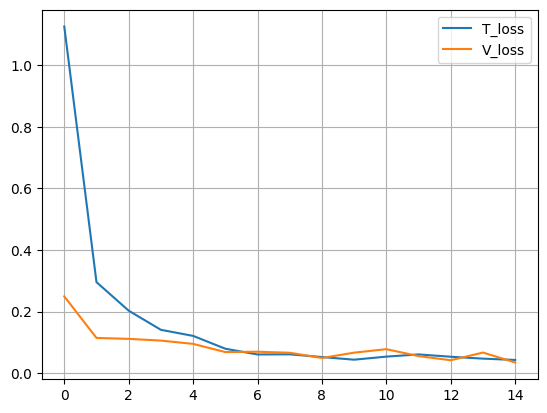

In [32]:
plt.plot(ANM.history['loss'], label='T_loss')
plt.plot(ANM.history['val_loss'], label='V_loss')
plt.legend()
plt.grid(True)

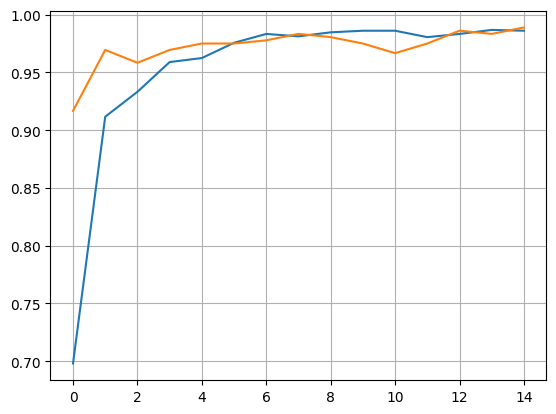

In [33]:
plt.plot(ANM.history['accuracy'],label='Train_Acc')
plt.plot(ANM.history['val_accuracy'],label='V-Acc')
plt.grid(True)

In [34]:
y_pred = model.predict(pca_xtest)

12/12 [==============================] - 0s 2ms/step


In [35]:
predictions = np.argmax(y_pred,axis=1)
predictions

array([2, 4, 8, 9, 4, 9, 4, 3, 9, 9, 1, 1, 2, 3, 2, 1, 1, 3, 5, 5, 3, 9,
       0, 8, 0, 3, 7, 8, 2, 3, 6, 7, 3, 8, 9, 4, 9, 0, 0, 1, 0, 2, 4, 3,
       2, 3, 8, 4, 4, 1, 0, 2, 7, 8, 2, 1, 3, 2, 2, 7, 4, 8, 6, 2, 1, 6,
       5, 1, 8, 3, 9, 5, 1, 5, 8, 1, 9, 9, 0, 9, 5, 0, 4, 2, 4, 7, 4, 8,
       9, 9, 5, 2, 2, 7, 6, 5, 4, 6, 4, 4, 0, 0, 0, 6, 3, 5, 9, 8, 8, 3,
       9, 8, 7, 6, 0, 1, 9, 4, 1, 2, 8, 3, 1, 4, 7, 1, 5, 2, 3, 0, 2, 7,
       6, 1, 4, 3, 0, 8, 3, 4, 0, 8, 0, 9, 6, 9, 7, 1, 4, 6, 7, 4, 9, 9,
       9, 5, 5, 4, 4, 3, 1, 6, 0, 2, 5, 9, 8, 1, 7, 6, 6, 2, 5, 6, 1, 5,
       4, 8, 8, 4, 2, 8, 7, 0, 5, 7, 7, 6, 5, 8, 6, 9, 6, 7, 5, 7, 8, 8,
       6, 5, 7, 5, 5, 5, 9, 5, 6, 2, 0, 9, 0, 2, 1, 8, 3, 2, 3, 9, 1, 3,
       8, 2, 7, 2, 8, 5, 2, 8, 6, 3, 7, 5, 5, 4, 7, 7, 7, 5, 2, 4, 9, 3,
       9, 2, 3, 9, 8, 3, 6, 8, 4, 9, 2, 7, 7, 5, 6, 9, 2, 1, 0, 8, 9, 7,
       5, 3, 9, 4, 4, 5, 6, 2, 7, 0, 8, 1, 5, 7, 5, 1, 2, 0, 3, 8, 7, 8,
       4, 2, 2, 0, 4, 8, 5, 3, 4, 3, 8, 3, 0, 3, 7,

In [36]:
print(confusion_matrix(ytest,predictions))

[[28  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  1  0  0]
 [ 0  0  0  0 43  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 39  0]
 [ 0  0  0  1  0  0  0  0  1 34]]


In [37]:
print(accuracy_score(ytest,predictions))

0.9888888888888889


**Now using CNN**

In [38]:
X = digits.images
y = digits.target
print(X.shape)
print(y.shape)

(1797, 8, 8)
(1797,)


**CNN requires a color channel, as the images are of grayscale, lets add a color channel to those.**

In [39]:
X = X.reshape(-1,8,8,1)
X = X/16.0   # to normalize
y = to_categorical(y,num_classes=10)

In [40]:
xtrain,xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=13)

In [41]:
xtrain[0].shape

(8, 8, 1)

In [42]:
i = Input(shape=xtrain[0].shape)
x = Conv2D(32,(3,3),strides=(2,2), padding='same', activation='leaky_relu')(i)
x = BatchNormalization()(x)

x = Conv2D(64,(3,3),strides=(2,2),  padding='same', activation='leaky_relu')(x)
x = BatchNormalization()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(350,activation='leaky_relu')(x)
x = Dropout(0.15)(x)
x = Dense(740,activation='leaky_relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8, 8, 1)]         0         
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 32)          320       
                                                                 
 batch_normalization (Batch  (None, 4, 4, 32)          128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 64)          18496     
                                                                 
 batch_normalization_1 (Bat  (None, 2, 2, 64)          256       
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 256)               0     

In [43]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
CNN_DD = model.fit(xtrain, Ytrain, validation_data=(xtest, Ytest), epochs=15,batch_size=15)

Epoch 1/15
96/96 [==============================] - 2s 8ms/step - loss: 0.4597 - accuracy: 0.8546 - val_loss: 1.7033 - val_accuracy: 0.5028
Epoch 2/15
96/96 [==============================] - 1s 6ms/step - loss: 0.1890 - accuracy: 0.9360 - val_loss: 1.2036 - val_accuracy: 0.6528
Epoch 3/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0985 - accuracy: 0.9624 - val_loss: 0.8011 - val_accuracy: 0.7194
Epoch 4/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0941 - accuracy: 0.9631 - val_loss: 0.3143 - val_accuracy: 0.8861
Epoch 5/15
96/96 [==============================] - 1s 6ms/step - loss: 0.1431 - accuracy: 0.9548 - val_loss: 0.1495 - val_accuracy: 0.9556
Epoch 6/15
96/96 [==============================] - 1s 6ms/step - loss: 0.1043 - accuracy: 0.9680 - val_loss: 0.1296 - val_accuracy: 0.9583
Epoch 7/15
96/96 [==============================] - 1s 6ms/step - loss: 0.0582 - accuracy: 0.9840 - val_loss: 0.0836 - val_accuracy: 0.9750
Epoch 8/15
96/96 [==

In [44]:
print("Training Score",model.evaluate(xtrain,Ytrain))
print("Test Score",model.evaluate(xtest,Ytest))

45/45 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9944
Training Score [0.01698737032711506, 0.9944328665733337]
12/12 [==============================] - 0s 3ms/step - loss: 0.1346 - accuracy: 0.9667
Test Score [0.1345997452735901, 0.9666666388511658]


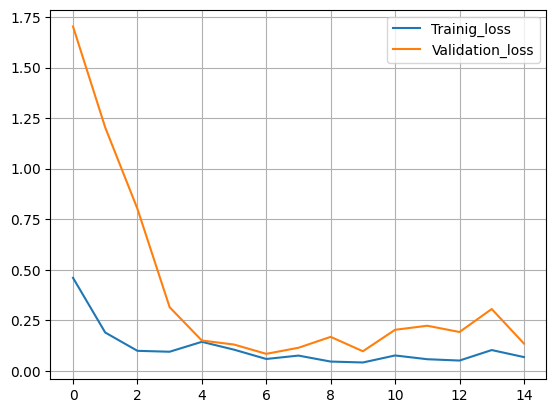

In [45]:
plt.plot(CNN_DD.history['loss'],label='Trainig_loss')
plt.plot(CNN_DD.history['val_loss'],label='Validation_loss')
plt.legend()
plt.grid(True)

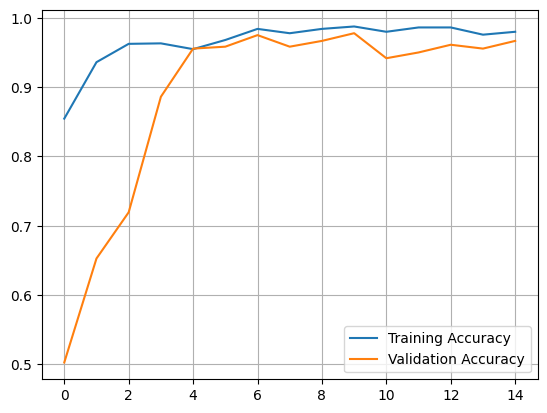

In [46]:
plt.plot(CNN_DD.history['accuracy'],label='Training Accuracy')
plt.plot(CNN_DD.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.grid(True)

In [47]:
Y_pred=model.predict(xtest)
Y_predictions = np.argmax(Y_pred,axis=1)
Y_predictions

12/12 [==============================] - 0s 2ms/step


array([9, 1, 1, 3, 1, 3, 4, 9, 5, 8, 8, 0, 2, 5, 0, 4, 4, 6, 4, 1, 1, 1,
       6, 4, 4, 9, 5, 4, 9, 1, 5, 0, 8, 5, 1, 0, 0, 3, 8, 0, 1, 8, 2, 1,
       0, 1, 9, 9, 4, 4, 3, 6, 7, 8, 0, 1, 6, 5, 5, 2, 5, 9, 1, 1, 3, 5,
       3, 9, 7, 6, 5, 2, 3, 1, 7, 6, 1, 1, 6, 8, 5, 5, 9, 6, 2, 5, 0, 8,
       9, 6, 1, 3, 0, 9, 7, 5, 5, 8, 6, 2, 4, 4, 2, 5, 6, 3, 7, 5, 3, 5,
       5, 4, 9, 3, 3, 2, 7, 8, 9, 8, 2, 4, 7, 4, 5, 3, 2, 2, 8, 3, 5, 9,
       9, 5, 2, 7, 6, 8, 9, 3, 6, 0, 5, 3, 9, 3, 7, 5, 6, 2, 4, 8, 2, 9,
       4, 0, 6, 7, 2, 3, 0, 0, 4, 9, 5, 4, 1, 9, 4, 1, 5, 5, 7, 0, 2, 9,
       8, 4, 7, 2, 5, 5, 4, 8, 2, 2, 0, 4, 8, 4, 0, 5, 3, 2, 9, 6, 8, 8,
       1, 4, 5, 6, 5, 0, 1, 3, 6, 5, 2, 8, 0, 7, 0, 6, 0, 8, 7, 2, 3, 6,
       2, 7, 3, 3, 9, 9, 5, 6, 6, 9, 6, 0, 6, 4, 2, 7, 3, 5, 2, 4, 0, 0,
       7, 2, 3, 8, 6, 1, 6, 9, 5, 0, 1, 6, 3, 2, 3, 9, 5, 1, 1, 1, 6, 9,
       4, 4, 8, 3, 3, 4, 1, 2, 6, 1, 9, 1, 4, 9, 4, 6, 1, 1, 2, 9, 2, 0,
       8, 0, 1, 5, 5, 5, 2, 9, 8, 5, 9, 2, 7, 0, 6,

In [48]:
print(accuracy_score(np.argmax(Ytest,axis=1),Y_predictions))
confusion_matrix(np.argmax(Ytest,axis=1),Y_predictions)

0.9666666666666667


array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 23,  0,  2],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 32]])